# <center>White Wine Quality</center>


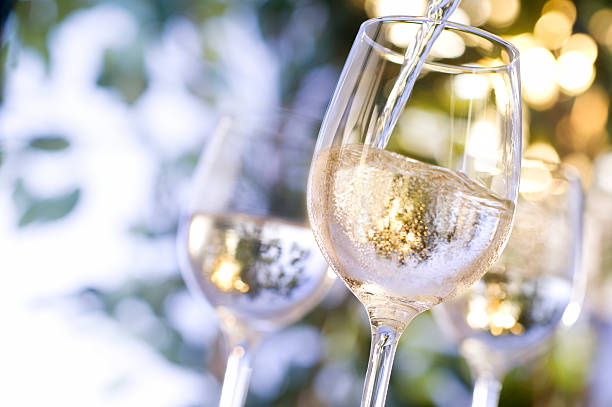

In [ ]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib as plot
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
white = pd.read_csv('/kaggle/input/white-wine-quality/winequality-white.csv', sep = ';')

In [ ]:
white.head()

In [ ]:
white.describe(include='all')

In [ ]:
white.isna().sum()

There are no missing values. Hence, there is no need of imputation.

In [ ]:
white.info()

We can see that all the featues are numeric.

### Visualization

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(white.corr(), annot=True, robust=True)

`density` and `residual sugar` have 84% correlation. Hence, we can drop either of the columns. 

In this case, *residual sugar* has very low correlations with our target variable, *quality*. Hence, we would drop this.

In [ ]:
white.drop('residual sugar', axis = 1, inplace = True)

Separating the dependent and independent variables

In [ ]:
X = white.drop('quality', axis=1)
y = white['quality'].astype('category')

In [ ]:
cols = X.columns


In [ ]:
fig = plt.figure(figsize=(20,90))

for i in range(1, len(cols)):
    ax = fig.add_subplot(20, 2, i)
    g = sns.distplot(X[cols[i]], bins=80)
    plt.title(cols[i])
    
    

In [ ]:
plt.figure(figsize=(10,7))

sns.countplot(x = y)

The target variable `quality` is normally distributed


___

## Pre-processing 

### Train-Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, 
                                                    stratify = y, random_state = 1234)

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
print(X_valid.shape)
print(y_valid.shape)

### Standardization

___

# Model Building and Model Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def model_building(model, parameters = None, cv = 10, scale = False):
    if parameters == None:
        model.fit(X_train, y_train)
        actual_train = y_train
        prediction_train = model.predict(X_train)
        actual_valid = y_valid
        prediction_valid = model.predict(X_valid)
        
        ####### Model Evaluation #######
        print("---------",model,"-----------")
        print("----TRAINING REPORT------\n")
        print(classification_report(actual_train, prediction_train, digits=4))
        print("----VALIDATION REPORT------\n")
        print(classification_report(actual_valid, prediction_valid, digits=4))
        print("\n")
        return(model, prediction_train, prediction_valid)
    else:
        model_cv = GridSearchCV(estimator = model, param_grid = parameters, cv = cv)
        model_cv.fit(X_train, y_train)
        actual_train = y_train
        prediction_train = model.predict(X_train)
        actual_valid = y_valid
        prediction_valid = model.predict(X_valid)
        
        ####### Model Evaluation #######
        print("---------",model,"-----------")
        print("----TRAINING REPORT------\n")
        print(classification_report(actual_train, prediction_train, digits=4))
        print("----VALIDATION REPORT------\n")
        print(classification_report(actual_valid, prediction_valid, digits=4))
        print("\n")
        model = model_cv.best_estimator_
    

        return(model_cv, prediction_train, prediction_valid)


<div class="alert alert-block alert-info"><b>
    
The models that we would be implementing are:
 - KNearest Neighbour Classifier
 - Decision Tree Classifier
 - XGBoost Classifier
 - Gradient Boost Classifier
 - Random Forest Classifier
 
</b> </div>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [ ]:
models = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier()]
for model in models :
    
    model, pred_train, pred_valid = model_building(model)

## Evaluation Metrics

There is not "best" or "right" evaluation metric for any classification problem (or for any ML model, per se). It completely depends on thee *USE-CASE*.

In this case, since it is a multi-class classification problem, we will be using **Weighted Average** values to compare the model.

**NOTE**: Why "Weighted Average"? Since we are dealing with a multi-class classification problem, Weighted Average is a better metric to compare the models. It assigns *class-wise weights* to each class and calculates each class's metrics accordingly.

## Observations
1. If you check the training report of *Decision Tree Classifier* and *Random Forest Classifier*, both of them have **1.000** everywhere. Those are true values, because both these models tend to *learn* the data completely and hence encounter a "seeming" problem of *overfitting*. Although, the validation report suggests a different story!
2. Out of all, Random Forest Classifier gives the best weighted average F1-Score of about 65%.
3. AdaBoost Classifier performs the worst in terms of the evaluation metrics (about 37%).


## Conclusion

Since the best performance is given by Random Forest Classifier, I would build the model using the same.


## Caveat

While choosing the metrics, it is important to understand what the business case is expecting. In our case, we did not have any clear indication about any evaluation metric, so we picked up *Weighted Average F1-Score*. If the business case said "We are concerned about the FALSE POSITIVES", then we would have picked *Weighted Average Precision*. If the business case said "We are serious about the FALSE NEGATIVES", then we would have picked *Weighted Average Recall*. 

Hence, make sure you understand the business case before choosing the metric(s) for your model.

_______
## NOTE
I would highly recommend to go through the blogs below to get a better understanding about the model evaluation metrics. It is a 2-part series. Do read it throughly.

Link: https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2

_______


# <center>End Of The Notebook</center>